# pconv2 - Periodic convolution, kernel origin at array origin

## Synopse

1D, 2D or 3D Periodic convolution. (kernel origin at array origin)

- **g = pconv2(f, h)**

  - **g**: Image. Output image. 

  - **f**: Image. Input image.
  - **h**: Image. PSF (point spread function), or kernel. The origin is at the array origin.


## Description

Perform a 1D, 2D or 3D discrete periodic convolution. The kernel origin is at the origin of image h. 
Both image and kernel are periodic with same period. Usually the kernel h is smaller than the image f, 
so h is padded with zero until the size of f. Supports complex images.

In [25]:
def pconv2(f,h):
    import numpy as np

    h_ind=np.nonzero(h)
    f_ind=np.nonzero(f)
    if len(h_ind[0])>len(f_ind[0]):
        h,    f    = f,    h
        h_ind,f_ind= f_ind,h_ind

    gs = np.maximum(np.array(f.shape),np.array(h.shape))
    if (f.dtype == 'complex') or (h.dtype == 'complex'):
        g = np.zeros(gs,dtype='complex')
    else:
        g = np.zeros(gs)

    f1 = g.copy()
    f1[f_ind]=f[f_ind]      

    if f.ndim == 1:
        (W,) = gs
        col = np.arange(W)
        for cc in h_ind[0]:
            g[:] += f1[(col-cc)%W] * h[cc]

    elif f.ndim == 2:
        H,W = gs
        row,col = np.indices(gs)
        for rr,cc in np.transpose(h_ind):
            g[:] += f1[(row-rr)%H, (col-cc)%W] * h[rr,cc]

    else:
        Z,H,W = gs
        d,row,col = np.indices(gs)
        for dd,rr,cc in np.transpose(h_ind):
            g[:] += f1[(d-dd)%Z, (row-rr)%H, (col-cc)%W] * h[dd,rr,cc]
    return g

In [26]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ! jupyter nbconvert --to 'python' pconv2
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook pconv2.ipynb to python
[NbConvertApp] Writing 6030 bytes to pconv2.py


## Examples

Numerical Example 1D

In [27]:
if testing:
    f = np.array([1,0,0,0,0,1,0,0,0])
    print("f:",f)
    
    h = np.array([1,2,3])
    print("h:",h)
    
    g1 = pconv2(f,h)
    g2 = pconv2(h,f)
    print("g1:",g1)
    print("g2:",g2)

f: [1 0 0 0 0 1 0 0 0]
h: [1 2 3]
g1: [ 1.  2.  3.  0.  0.  1.  2.  3.  0.]
g2: [ 1.  2.  3.  0.  0.  1.  2.  3.  0.]


Numerical Example 2D

In [28]:
if testing:
    f = np.array([[1,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0,0,0]])
    print("\n Image (f):")
    print(f)
    
    h = np.array([[1,2,3],
                 [4,5,6]])
    print("\n Image Kernel (h):")
    print(h)
    
    result = pconv2(f,h)
    print("\n Image Output - (G):")
    print(result)


 Image (f):
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]

 Image Kernel (h):
[[1 2 3]
 [4 5 6]]

 Image Output - (G):
[[ 1.  2.  3.  0.  0.  0.  0.  0.  0.]
 [ 4.  5.  6.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.]
 [ 2.  3.  0.  4.  5.  6.  0.  0.  1.]
 [ 5.  6.  0.  0.  0.  0.  0.  0.  4.]]


Numerical Example 3D

In [29]:
if testing:
    f = np.zeros((3,3,3))
    f[0,1,1] = 1
    f[1,1,1] = 1
    f[2,1,1] = 1
     
    print("\n Image Original (F): ")
    print(f)

    h = np.array([[[ 1,  2, 3 ],[ 3,  4, 5 ], [ 5,  6, 7 ]],
                 [ [ 8,  9, 10],[11, 12, 13], [14, 15, 16]],
                 [ [17, 18, 19],[20, 21, 22], [23, 24, 25]]])
              
    print("\n Image Kernel (H): ")
    print(h)
    
    result = pconv2(f,h)
    print("\n Image Output - (G): ")
    print(result)


 Image Original (F): 
[[[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]]

 Image Kernel (H): 
[[[ 1  2  3]
  [ 3  4  5]
  [ 5  6  7]]

 [[ 8  9 10]
  [11 12 13]
  [14 15 16]]

 [[17 18 19]
  [20 21 22]
  [23 24 25]]]

 Image Output - (G): 
[[[ 48.  42.  45.]
  [ 32.  26.  29.]
  [ 40.  34.  37.]]

 [[ 48.  42.  45.]
  [ 32.  26.  29.]
  [ 40.  34.  37.]]

 [[ 48.  42.  45.]
  [ 32.  26.  29.]
  [ 40.  34.  37.]]]


Example with Image 2D


Prewitt´s Mask
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


""
a) - Original Image
""
b) Prewitt´s Mask filtering
""
c) absolute of Prewitt´s Mask filtering

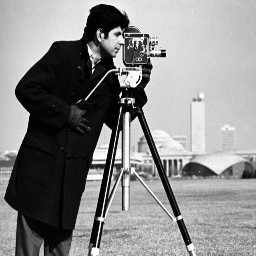
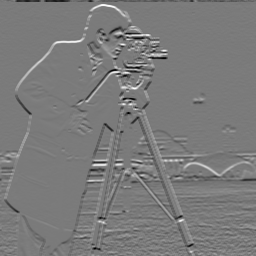
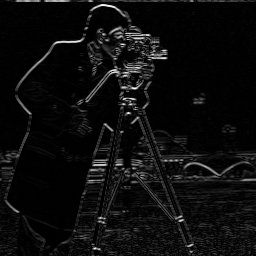

In [30]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    nb = ia.nbshow(3)
    nb.nbshow(f, title = 'a) - Original Image')
    h = np.array([[-1,-1,-1],
                 [ 0, 0, 0],
                 [ 1, 1, 1]])
    g = pconv2(f,h)
    print("\nPrewitt´s Mask")
    print(h)
    
    gn = ia.normalize(g, [0,255])
    nb.nbshow(gn, title = 'b) Prewitt´s Mask filtering')

    nb.nbshow(ia.normalize(abs(g)), title = 'c) absolute of Prewitt´s Mask filtering')
    nb.nbshow()

Example with Image 3D

""
Figure a) - Original Image
""
Figure b) - 3D Periodic Convolution. - Prewitt´s Mask
""
Figure c) - 3D Periodic Convolution. - Prewitt´s Mask (Negative)

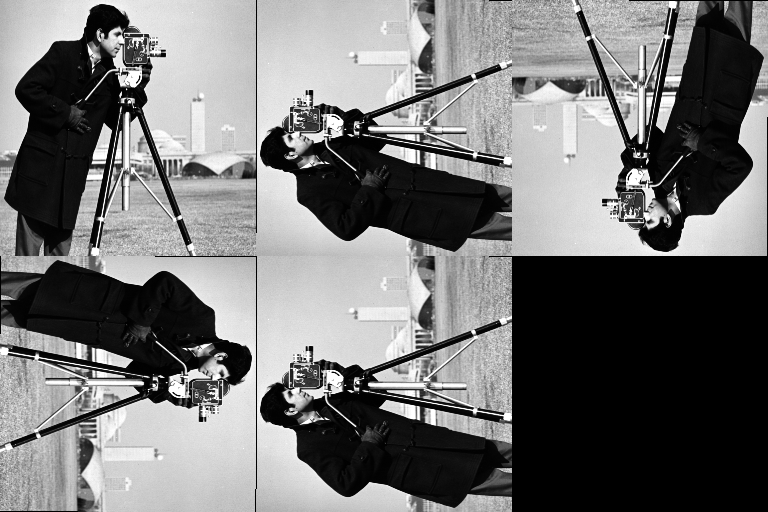
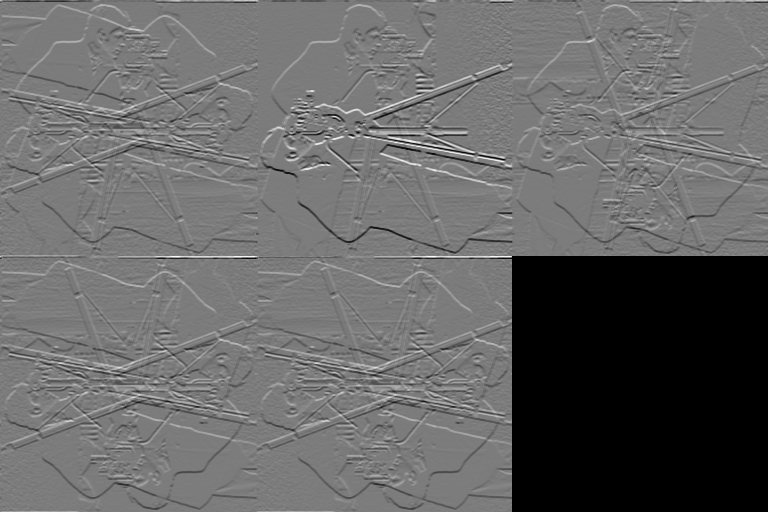
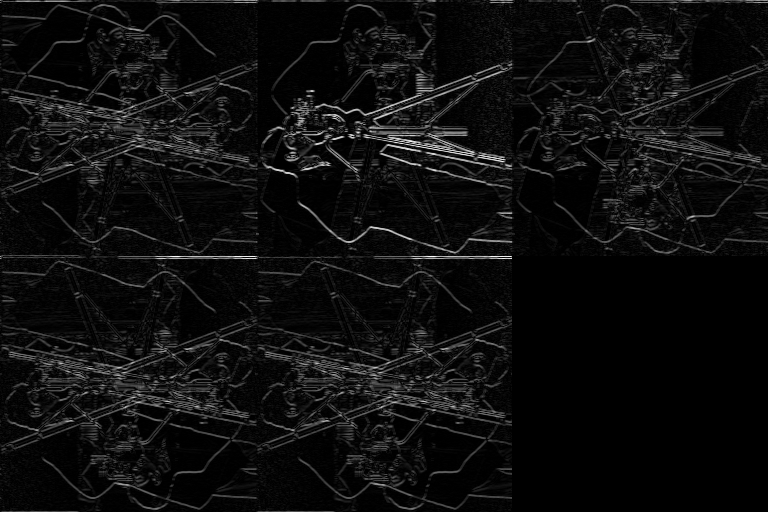

In [24]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    f3d = np.stack((np.copy(f)
                    ,scipy.ndimage.interpolation.rotate(f, 90, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 180, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 270, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 90, reshape=False)))
    
    linhas,colunas,fatias = f3d.shape
    
    h = np.array([[[-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1 ]],
                 [ [-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1]],
                 [ [-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1 ]]])
    
    g = pconv2(f3d,h)
    
    gdata = ia.normalize(f3d).astype(np.uint8)    
    gn = ia.normalize(g).astype(np.uint8)
    gn1 = ia.normalize(abs(g)).astype(np.uint8)
    
    nb = ia.nbshow(3)
    nb.nbshow(ia.mosaic(gdata,3), title ='Figure a) - Original Image') 
    nb.nbshow(ia.mosaic(gn,   3), title ='Figure b) - 3D Periodic Convolution. - Prewitt´s Mask')  
    nb.nbshow(ia.mosaic(gn1,  3), title ='Figure c) - 3D Periodic Convolution. - Prewitt´s Mask (Negative)')
    nb.nbshow()

## Equation

$$
    f(i) = f(i + kN), h(i)=h(i+kN)
$$

$$
mod(i,N) = i - N \lfloor \frac{i}{N} \rfloor 
$$

$$
(f \ast_W h) (col) = \sum_{cc=0}^{W-1} f(mod(col-cc,W)) h(cc)
$$

$$
(f \ast_{(H,W)} h) (row,col) = \sum_{rr=0}^{H-1} \sum_{cc=0}^{W-1} f(mod(row-rr,H), mod(col-cc,W)) h(rr,cc)
$$

$$
    (f \ast_{(Z,H,W)} h) (d,row,col) =  \sum_{dd=0}^{Z-1} \sum_{rr=0}^{H-1} \sum_{cc=0}^{W-1} f(mod(d-dd,Z), mod(row-rr,N), mod(col-cc,W)) h(dd,rr,cc) 
$$
    

## See also

- `pconv pconv` - Periodic discrete convolution, kernel origin at center
- `conv conv`  - 2D or 3D linear discrete convolution.
- `ptrans ptrans`  - Periodic translation.
- `convteo convteo`  - Illustrate the convolution theorem.

## Contributions:

- Francislei J. Silva (set 2013)
- Roberto M. Souza (set 2013)
- Leonardo Bianconi (jun 2017)